In [21]:
from pyhamrds import bhoss
import os

#datadir = '/ccs/home/astrodoo/MEMW/BHOSS/BHOSS_CODE/outcomes/C3D2R512'
#data = 'GRRT_IMAGE_bhoss_data80.dat'

datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc10/BHOSS_CODE"
data = "f05_b1_incl_10_IMAGE_GRMHD_HAMR3D_SANEA0_686.dat"
#data = "Rh40_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_SANEA93M_132.dat"
#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT_old/BHOSS_CODE"

bhdata = bhoss.read_image(os.path.join(datadir,data),silent=False,ifreq=2)  # Koushik's data - only 230GHz

===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 5
time: 9464.088744 Rg/c, inclination: 10.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [  43.   86.  230.  345. 1360.]
All-freq image is included (3rd column in image data): False
length of data: 480000
xmin: -101.266842, xmax: 101.266842, ymin: -101.266842, ymax: 101.266842
intensity (min,max)= 0.0 0.00342123
Total flux = 2.022947 Jy at 230 GHz


===================================== header ==================================
width: 20.134000 Rg, offset: 0.000000 Rg, resolution: 400, Number of obs. freqs: 1
time: 9146.117533 Rg/c, inclination: 90.000000 deg, phi: 0.000000 deg, BH spin: 0.000000
Luminosity correction: 4.762071e+22, Jansky correction: 6.025933e-01, Micro Arcsecond correction: 5.029644e+00
Frequencies of intereset [GHz]: [230.]
All-freq image is included (3rd column in image data): False
480000
-101.26684243394799 101.26684243394799 -101.26684243394799 101.26684243394799
(zmin,zmax)= 0.0 0.00946501
Total flux = 1.944447 Jy at 230 GHz
147:47:39.030 - Start Program


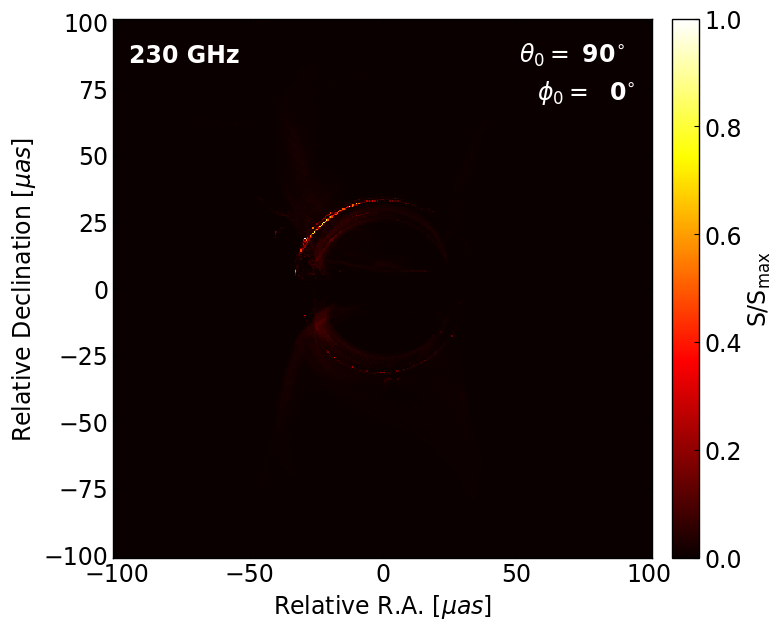

In [34]:
from pyhamrds import bhoss
import matplotlib.pyplot as plt
import os
%matplotlib inline

#datadir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_MA05/Rh1/inc10/BHOSS_CODE"
#data = "Rh1_Rl1_sig1_i10_ph0_SgrA_Th_IMAGE_GRMHD_HAMR3D_EHT_MADS41A5_331.dat"

filename  = os.path.join(datadir, data)

figdir = os.environ['PYTHONFIG']
#bhoss.show_image(filename,ifreq=10,cmap='hot',out=os.path.join(figdir,'bhoss_img_David512_201.png'))
bhoss.show_image(filename,ifreq=0,cmap='hot') # Koushik's data - only 230GHz

# Check Average Flux

In [1]:
import os
import numpy as np

#find average flux
def bhoss_avg(Te_model,inclination,model_name, ifreq=2):

    note=""
    if (model_name == "MADS41A5"):
        model_str = "bhoss_MA05"
        ind_start = 311
        ind_end = 410
    elif (model_name == "MADS41A0"):
        model_str = "bhoss_MA0"
        ind_start = 97
        ind_end = 196
    elif (model_name == "MADS41A93"):
        model_str = "bhoss_MA93"
        ind_start = 96
        ind_end = 195
    elif (model_name == "SANEA93M"):
        model_str = "bhoss_SA93M"
        ind_start=132
        ind_end = 231
    elif (model_name == "SANEA93"):
        model_str = "bhoss_SA93"
        ind_start=99
        ind_end = 198
    elif (model_name == "SANEA05"):
        model_str = "bhoss_SA05"
        ind_start=900
        ind_end = 999
        note="192_"
    elif (model_name == "SANEA0"):
        model_str = "bhoss_SA0"
        ind_start=640
        ind_end = 739
    else:
        print("no model")
        return
    if ((inclination==10) | (inclination==30) | (inclination==50) | (inclination==70) | (inclination==90)):
        inc_str = "inc%d"%inclination
    else:
        print("no model")
        return
    
    basedir = "/lustre04/scratch/astrodoo/BHOSS_EHT"
    workdir = os.path.join(basedir,model_str,Te_model,inc_str,'BHOSS_CODE')
    print("work directory %s"%workdir)
    os.chdir(workdir)
    
    z_tot=np.zeros((ind_end-ind_start+1))
    time =np.zeros((ind_end-ind_start+1))
    ind  =np.zeros((ind_end-ind_start+1))
    
    file_path = os.getcwd()
    
    print("ifreq=%d: Should be checked if it is the correct freqency."%ifreq)
    for image_ind in range(ind_start,ind_end+1):
        data_name="%s_incl_%d_IMAGE_GRMHD_HAMR3D_%s_%s%d.dat" \
        %(Te_model,inclination,model_name,note,image_ind)
        filename  = os.path.join(file_path, data_name)
        
        header_1 = np.genfromtxt(filename, max_rows = 1)
        header_2 = np.genfromtxt(filename, skip_header = 1, max_rows = 1)
        header_3 = np.genfromtxt(filename, skip_header = 2, max_rows = 1)
        M           = int(header_1[2])
        Jansky_corr          = header_2[5]
        #ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, 2))
        ascii2 = np.loadtxt(filename, skiprows = 3, usecols = (0, 1, ifreq+2))
        data2=ascii2.reshape([M, M, 3])
        z    = data2[:,:,2]*Jansky_corr #convert to Jansky
        z_tot[image_ind-ind_start]=np.sum(z)
        
        ind[image_ind-ind_start] = image_ind
        time[image_ind-ind_start] = header_2[0]   # time
        
        print("%d, flux: %f at %f"%(image_ind,z_tot[image_ind-ind_start],time[image_ind-ind_start]))
        
    dscale = header_2[7]
    print(model_name+Te_model,"Average total flux =", np.sum(z_tot)/(ind_end-ind_start+1), \
          "Jy; density_scale=", dscale)
    return (ind,time,z_tot,dscale) 

In [2]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 10, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc10/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 2.070218 at 9008.689295
641, flux: 2.180913 at 9014.196155
642, flux: 2.365906 at 9025.197202
643, flux: 2.042887 at 9036.191861
644, flux: 2.072171 at 9047.179248
645, flux: 1.836697 at 9058.195251
646, flux: 1.790816 at 9063.697016
647, flux: 1.637677 at 9074.704992
648, flux: 1.535069 at 9085.701679
649, flux: 1.588161 at 9096.689234
650, flux: 1.611478 at 9107.679785
651, flux: 1.655694 at 9118.661631
652, flux: 1.764405 at 9124.150162
653, flux: 2.326499 at 9135.137384
654, flux: 1.738969 at 9146.117533
655, flux: 1.376598 at 9157.096020
656, flux: 1.442861 at 9168.076667
657, flux: 1.523315 at 9173.556786
658, flux: 1.770718 at 9184.542398
659, flux: 1.882581 at 9195.521032
660, flux: 1.787511 at 9206.470801
661, flux: 1.869020 at 9217.433929
662, flux: 1.631607 at 9228.418806
663, flux: 1.673898 at 9233.902779
664, flux: 1.582

In [3]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [4]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc10/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 2.023381 Jy, the density scale = 1.900000e-14


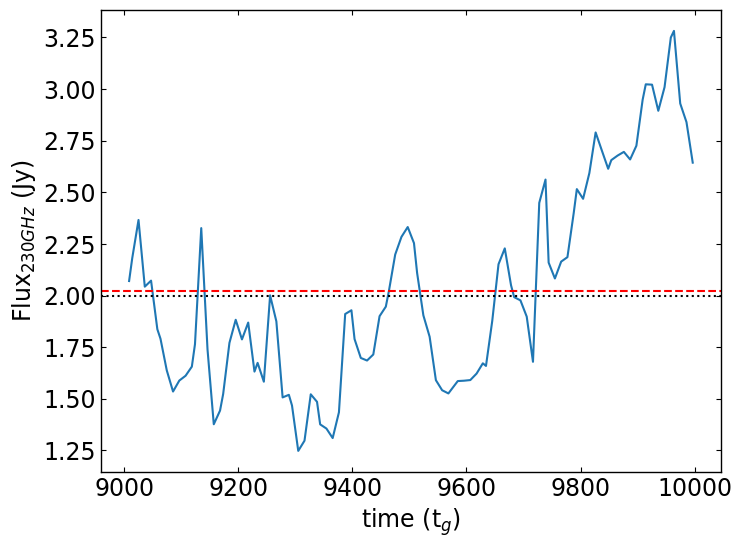

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [6]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

640:: 2.070218 Jy at 9008.689295
641:: 2.180913 Jy at 9014.196155
642:: 2.365906 Jy at 9025.197202
643:: 2.042887 Jy at 9036.191861
644:: 2.072171 Jy at 9047.179248
645:: 1.836697 Jy at 9058.195251
646:: 1.790816 Jy at 9063.697016
647:: 1.637677 Jy at 9074.704992
648:: 1.535069 Jy at 9085.701679
649:: 1.588161 Jy at 9096.689234
650:: 1.611478 Jy at 9107.679785
651:: 1.655694 Jy at 9118.661631
652:: 1.764405 Jy at 9124.150162
653:: 2.326499 Jy at 9135.137384
654:: 1.738969 Jy at 9146.117533
655:: 1.376598 Jy at 9157.096020
656:: 1.442861 Jy at 9168.076667
657:: 1.523315 Jy at 9173.556786
658:: 1.770718 Jy at 9184.542398
659:: 1.882581 Jy at 9195.521032
660:: 1.787511 Jy at 9206.470801
661:: 1.869020 Jy at 9217.433929
662:: 1.631607 Jy at 9228.418806
663:: 1.673898 Jy at 9233.902779
664:: 1.582654 Jy at 9244.848899
665:: 2.000856 Jy at 9255.809475
666:: 1.874763 Jy at 9266.774154
667:: 1.506618 Jy at 9277.739726
668:: 1.519157 Jy at 9288.704649
669:: 1.467484 Jy at 9294.176767
670:: 1.24

In [22]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 50, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc50/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 2.299093 at 9008.689295
641, flux: 2.320727 at 9014.196155
642, flux: 2.268778 at 9025.197202
643, flux: 2.681565 at 9036.191861
644, flux: 2.463742 at 9047.179248
645, flux: 1.901159 at 9058.195251
646, flux: 1.721324 at 9063.697016
647, flux: 1.776812 at 9074.704992
648, flux: 1.564708 at 9085.701679
649, flux: 1.670512 at 9096.689234
650, flux: 1.571579 at 9107.679785
651, flux: 1.647765 at 9118.661631
652, flux: 1.773264 at 9124.150162
653, flux: 2.676649 at 9135.137384
654, flux: 2.014053 at 9146.117533
655, flux: 1.468848 at 9157.096020
656, flux: 1.538443 at 9168.076667
657, flux: 1.611949 at 9173.556786
658, flux: 1.941254 at 9184.542398
659, flux: 2.218225 at 9195.521032
660, flux: 2.171230 at 9206.470801
661, flux: 2.007771 at 9217.433929
662, flux: 1.786399 at 9228.418806
663, flux: 2.029875 at 9233.902779
664, flux: 1.860

In [23]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [24]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc50/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 2.087985 Jy, the density scale = 1.800000e-14


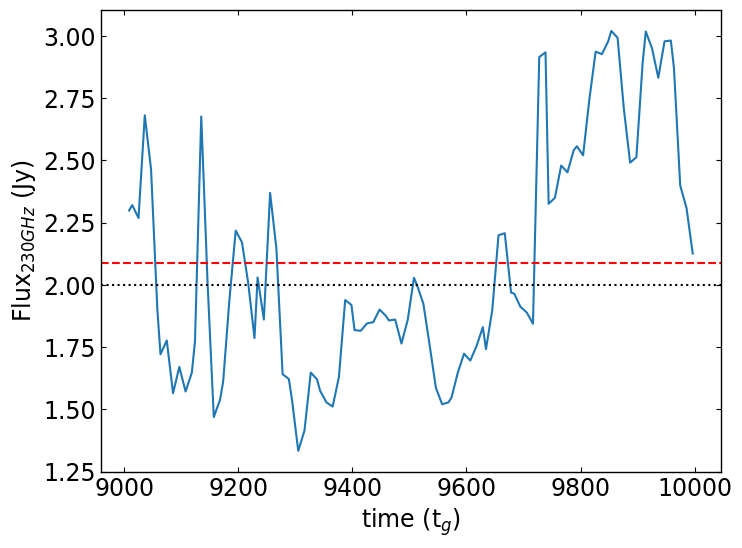

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [26]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

640:: 2.299093 Jy at 9008.689295
641:: 2.320727 Jy at 9014.196155
642:: 2.268778 Jy at 9025.197202
643:: 2.681565 Jy at 9036.191861
644:: 2.463742 Jy at 9047.179248
645:: 1.901159 Jy at 9058.195251
646:: 1.721324 Jy at 9063.697016
647:: 1.776812 Jy at 9074.704992
648:: 1.564708 Jy at 9085.701679
649:: 1.670512 Jy at 9096.689234
650:: 1.571579 Jy at 9107.679785
651:: 1.647765 Jy at 9118.661631
652:: 1.773264 Jy at 9124.150162
653:: 2.676649 Jy at 9135.137384
654:: 2.014053 Jy at 9146.117533
655:: 1.468848 Jy at 9157.096020
656:: 1.538443 Jy at 9168.076667
657:: 1.611949 Jy at 9173.556786
658:: 1.941254 Jy at 9184.542398
659:: 2.218225 Jy at 9195.521032
660:: 2.171230 Jy at 9206.470801
661:: 2.007771 Jy at 9217.433929
662:: 1.786399 Jy at 9228.418806
663:: 2.029875 Jy at 9233.902779
664:: 1.860935 Jy at 9244.848899
665:: 2.369764 Jy at 9255.809475
666:: 2.147919 Jy at 9266.774154
667:: 1.641315 Jy at 9277.739726
668:: 1.621736 Jy at 9288.704649
669:: 1.538287 Jy at 9294.176767
670:: 1.33

In [15]:
ind,time,z_tot,dscale = bhoss_avg("f05_b1", 90, "SANEA0", ifreq=2)

work directory /lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc90/BHOSS_CODE
ifreq=2: Should be checked if it is the correct freqency.
640, flux: 2.017527 at 9008.689295
641, flux: 1.939414 at 9014.196155
642, flux: 2.181996 at 9025.197202
643, flux: 1.947366 at 9036.191861
644, flux: 1.801061 at 9047.179248
645, flux: 1.933206 at 9058.195251
646, flux: 1.730160 at 9063.697016
647, flux: 1.777060 at 9074.704992
648, flux: 1.543872 at 9085.701679
649, flux: 1.684657 at 9096.689234
650, flux: 1.660761 at 9107.679785
651, flux: 1.669259 at 9118.661631
652, flux: 1.646207 at 9124.150162
653, flux: 2.126646 at 9135.137384
654, flux: 1.645963 at 9146.117533
655, flux: 1.366338 at 9157.096020
656, flux: 1.486841 at 9168.076667
657, flux: 1.533523 at 9173.556786
658, flux: 1.868802 at 9184.542398
659, flux: 2.116059 at 9195.521032
660, flux: 1.925052 at 9206.470801
661, flux: 1.851877 at 9217.433929
662, flux: 1.697399 at 9228.418806
663, flux: 1.670304 at 9233.902779
664, flux: 1.724

In [16]:
import numpy as np
import os
from shutil import copy2

# save the data for the faster read in next use.
outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'
np.savez(os.path.join(outdir,fname), time=time, ind=ind, z_tot=z_tot, dscale=dscale \
        ,info=[{'data':outdir,'code':'EHT_BHOSS' \
                ,'unit':{'time':'t_g','ind':'index','z_tot':'Jy','dscale':'unitless'}}])

In [17]:
import numpy as np
import os

outdir = "/lustre04/scratch/astrodoo/BHOSS_EHT/bhoss_SA0/f05_b1/inc90/BHOSS_CODE"
fname = 'flux230.npz'

data = np.load(os.path.join(outdir,fname))
time,z_tot,dscale,ind = data["time"], data["z_tot"], data["dscale"], data["ind"]


min/max/N index = 640/739/100
average z_tot = 1.947213 Jy, the density scale = 2.000000e-14


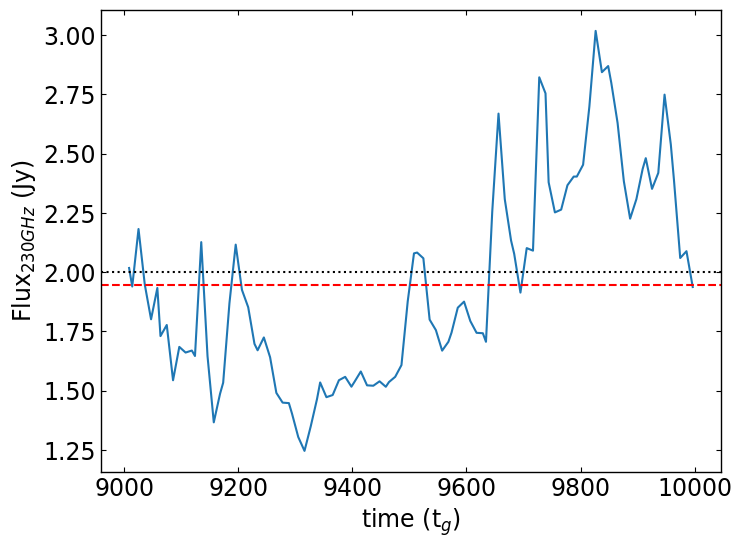

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline


z_ave = np.sum(z_tot)/float(len(z_tot))

fig,ax = plt.subplots()

ax.plot(time, z_tot)
ax.axhline(y=2, linestyle=":",color="k")
ax.axhline(y=z_ave, linestyle='--',color='red')

ax.set_xlabel(r'time (t$_g$)')
ax.set_ylabel(r'Flux$_{230 GHz}$ (Jy)')

print("min/max/N index = %d/%d/%d"%(ind[0],ind[-1],len(ind)))
print("average z_tot = %f Jy, the density scale = %e"%(z_ave,dscale))

In [19]:
for i,iind in enumerate(ind):
    print("%d:: %f Jy at %f"%(iind,z_tot[i],time[i]))

640:: 2.017527 Jy at 9008.689295
641:: 1.939414 Jy at 9014.196155
642:: 2.181996 Jy at 9025.197202
643:: 1.947366 Jy at 9036.191861
644:: 1.801061 Jy at 9047.179248
645:: 1.933206 Jy at 9058.195251
646:: 1.730160 Jy at 9063.697016
647:: 1.777060 Jy at 9074.704992
648:: 1.543872 Jy at 9085.701679
649:: 1.684657 Jy at 9096.689234
650:: 1.660761 Jy at 9107.679785
651:: 1.669259 Jy at 9118.661631
652:: 1.646207 Jy at 9124.150162
653:: 2.126646 Jy at 9135.137384
654:: 1.645963 Jy at 9146.117533
655:: 1.366338 Jy at 9157.096020
656:: 1.486841 Jy at 9168.076667
657:: 1.533523 Jy at 9173.556786
658:: 1.868802 Jy at 9184.542398
659:: 2.116059 Jy at 9195.521032
660:: 1.925052 Jy at 9206.470801
661:: 1.851877 Jy at 9217.433929
662:: 1.697399 Jy at 9228.418806
663:: 1.670304 Jy at 9233.902779
664:: 1.724490 Jy at 9244.848899
665:: 1.640802 Jy at 9255.809475
666:: 1.490560 Jy at 9266.774154
667:: 1.449487 Jy at 9277.739726
668:: 1.447471 Jy at 9288.704649
669:: 1.403271 Jy at 9294.176767
670:: 1.30